In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
print(matches.shape)
print(deliveries.shape)

(756, 18)
(179078, 21)


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2014-05-24,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [10]:
#1 No of seasons so far
matches.season.nunique()

12

In [11]:
#2 Getting number of matches in IPL so far
deliveries.match_id.nunique()

756

Number of matches won by top 3 teams of IPL : 301


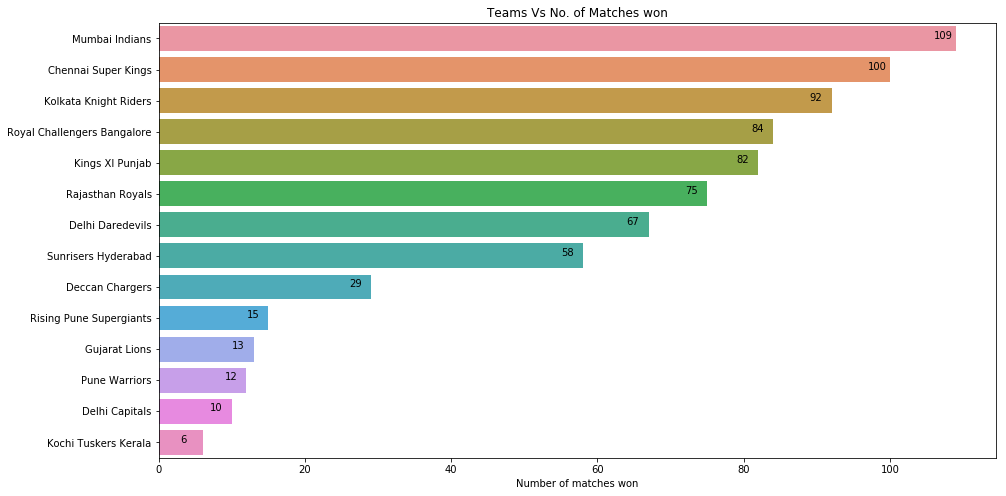

In [12]:
#3 Getting the total number of matches won by top 3 teams of IPL
fig = plt.figure(figsize=(15,8))
count = list(matches.winner.value_counts().values)
teams = matches.winner.value_counts().index
fig = sns.barplot(count,teams)
fig.set_xlabel('Number of matches won')
fig.set_title('Teams Vs No. of Matches won')
for i,cnt in enumerate(count):
    fig.text(cnt-3,i,str(cnt))    
print(f'Number of matches won by top 3 teams of IPL : {matches.winner.value_counts()[:3].values.sum()}')

In [13]:
#4 Total number of teams in IPL who has won atleast 1 match
matches.winner.nunique()

14

In [14]:
win_per.keys()

NameError: name 'win_per' is not defined

Avearge win percent of Mumbai Indians, Sunrisers Hyderabad, Kings XI Punjab : 52.861127616029584


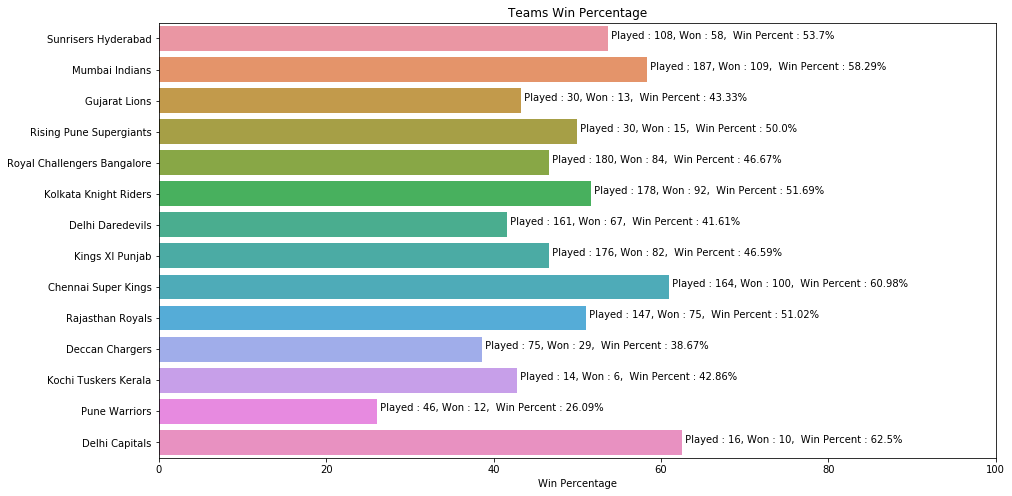

In [18]:
#5 Average win percent of teams Mumbai Indians, Sunrisers Hyderabad, Kings XI Punjab

teams = pd.DataFrame(pd.concat([matches.team1,matches.team2],axis=0).reset_index(drop=True),columns=['Team'])
total_matches = dict(teams.Team.value_counts())
won_matches   = dict(matches.winner.value_counts())
teams_win_per =[]
played = []
won = []
for i in teams.Team.unique():
    played.append(total_matches[i])
    won.append(won_matches[i])
    per = won_matches[i]/total_matches[i]
    teams_win_per.append(per*100)
    
fig = plt.figure(figsize=(15,8))
fig = sns.barplot(teams_win_per,teams.Team.unique())
fig.set_xlim([0,100])
fig.set_xlabel('Win Percentage')
fig.set_title('Teams Win Percentage')
for i,cnt in enumerate(teams_win_per):
    fig.text(cnt,i,' Played : '+ str(played[i]) + ', Won : '+str(won[i])+',  Win Percent : '+str(round(teams_win_per[i],2))+'%')

x = ['Mumbai Indians','Sunrisers Hyderabad','Kings XI Punjab']
ans=[]
for i in x:
    per = won_matches[i]/total_matches[i]
    ans.append(per*100)
print(f'Avearge win percent of Mumbai Indians, Sunrisers Hyderabad, Kings XI Punjab : {sum(ans)/len(ans)}')

In [19]:
#6 Teams with win percent more than 50%

ans = [value for value in teams_win_per if value>50 ]
print(f'Number of teams with win percent more than 50% : {len(ans)}')

Number of teams with win percent more than 50% : 6


In [20]:
# 7. Venue who has hosted max number of IPL games
print(f'Venue with max hosted IPL match is "{matches.venue.value_counts().index[0]}" with number of matches as {matches.venue.value_counts().max()}')
print('\n')

# 8 . Total Venues
print(f'Total Number of Venues in IPL : {len(matches.venue.value_counts())}')
print('\n')

Venue with max hosted IPL match is "Eden Gardens" with number of matches as 77


Total Number of Venues in IPL : 41




In [21]:
#9
umpires = pd.DataFrame(pd.concat([matches.umpire1,matches.umpire2],axis=0).reset_index(drop=True),columns=['Umpire'])
print('Top 3 umpires with most number of matches excluding 3rd umpire:')
for i in range(3):
    print(f'{umpires.Umpire.value_counts().index[i]:{20}} : {umpires.Umpire.value_counts()[i]:{3}} matches')

Top 3 umpires with most number of matches excluding 3rd umpire:
S Ravi               : 106 matches
HDPK Dharmasena      :  87 matches
C Shamshuddin        :  73 matches


In [22]:
#10
print('Total Number of Umpires till date excluding 3rd umpire : ',umpires.Umpire.value_counts().count())

Total Number of Umpires till date excluding 3rd umpire :  75


In [23]:
# 11 Runs scored by batsmen in all season other than boundaries i.e. (4,6)
# (Runs scored by batsman other than 4,6) + (total of extra runs)

other_than_boundaries_df  = deliveries[(deliveries.batsman_runs !=4)][(deliveries.batsman_runs !=6)]
run_other_than_boundaries = other_than_boundaries_df.batsman_runs.sum()
total_extra_runs = deliveries.extra_runs.sum()
print(f'Total Runs scored by all batsman in all IPL season other than boundaries : {run_other_than_boundaries+total_extra_runs}')

Total Runs scored by all batsman in all IPL season other than boundaries : 104702


C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Runs scored per IPL season other than 4,6')

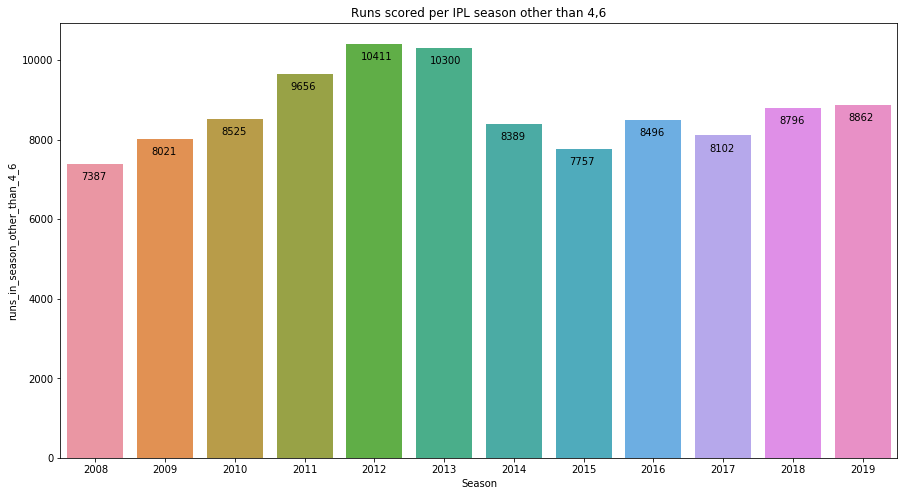

In [25]:
#12 Count of season with runs scored more than 10,000 other than scored from boundaries

df_12 = other_than_boundaries_df.groupby('match_id').agg({'batsman_runs':['sum']}).reset_index()
df_12.columns = ['id','runs_other_than_4_6']
df_12.head()
extra_df = deliveries.groupby('match_id').agg({'extra_runs':['sum']}).reset_index()
extra_df.columns = ['id','extra_runs']
df_12 = pd.merge(df_12,extra_df,on='id',how='left')
df_12['total_runs'] = df_12.runs_other_than_4_6 + df_12.extra_runs

season_df = pd.merge(matches[['season','id']],df_12,on='id',how = 'left')
runs_in_season = season_df.groupby('season').agg({'total_runs':['sum']}).reset_index()
runs_in_season.columns=['Season','runs_in_season_other_than_4_6']

fig = plt.figure(figsize=(15,8))
fig = sns.barplot(runs_in_season.Season,runs_in_season.runs_in_season_other_than_4_6)
for i,cnt in enumerate(runs_in_season.runs_in_season_other_than_4_6):
    fig.text(i-0.2,cnt-400,cnt)
fig.set_title(f'Runs scored per IPL season other than 4,6')

In [26]:
#13 Sum of max winning margin by runs from all the seasons

mat = matches.groupby(['season']).agg({'win_by_runs':['max']}).reset_index()
mat.columns = ['season','Win_Margin_max']
print('Sum of max winning margin by runs from all the seasons : ',mat.Win_Margin_max.sum())

Sum of max winning margin by runs from all the seasons :  1398


In [27]:
#14 Season with win margin by runs is max
print(f'Season with Win margin in the season as maximumm is : {mat[mat.Win_Margin_max==max(mat.Win_Margin_max)].season.values}')

Season with Win margin in the season as maximumm is : [2017]


In [28]:
#15 Total of player of the match award from Mumbai Indians & CSK
# In other words, number of matches played between MI & CSK

MI_CSK_matches = matches[(matches.team1 == 'Mumbai Indians') | (matches.team2 == 'Mumbai Indians')][(matches.team1 == 'Chennai Super Kings') | (matches.team2 == 'Chennai Super Kings')]
MI_CSK_matches.shape[0]

C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


28

In [29]:
#16 Number of Players who won Player of match awrad more than twice in a MI Vs CSK Match
MI_CSK_matches.player_of_match.value_counts()

RG Sharma          3
KA Pollard         3
SK Raina           3
HH Pandya          2
DR Smith           2
SR Tendulkar       2
ML Hayden          2
RE Levi            1
MEK Hussey         1
MS Dhoni           1
JJ Bumrah          1
MM Sharma          1
DJ Bravo           1
Harbhajan Singh    1
ST Jayasuriya      1
AS Yadav           1
A Nehra            1
MG Johnson         1
Name: player_of_match, dtype: int64

In [30]:
run_in_match = deliveries.groupby(['match_id','batting_team','batsman']).agg({'batsman_runs':['sum']}).reset_index()
run_in_match.columns = ['match_id','batting_team','batsman','runs']
#17
print('Number of fifties scored across all season  : ',run_in_match[run_in_match.runs>=50][run_in_match.runs<100].shape[0])

#18
print('Number of batsman who has ever scored 50    : ',run_in_match[run_in_match.runs>=50][run_in_match.runs<100].batsman.nunique())

#19
print('Number of hundreds scored across all season : ',run_in_match[run_in_match.runs>=100].shape[0])

#20
print('Number of batsman who has ever scored 100   : ',run_in_match[run_in_match.runs>=100].batsman.nunique())

Number of fifties scored across all season  :  1128
Number of batsman who has ever scored 50    :  149
Number of hundreds scored across all season :  62
Number of batsman who has ever scored 100   :  36


C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0.5, 1.0, 'Teams Centuries in IPL')

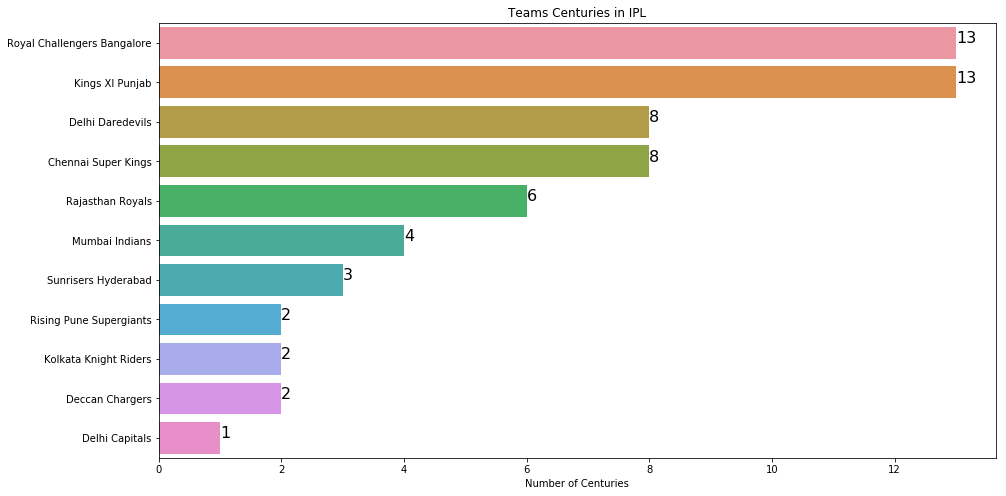

In [31]:
#21 Count of teams with individual players scoring more than 10 centuries

fig = plt.figure(figsize=(15,8))
fig = sns.barplot(run_in_match[run_in_match.runs>=100].batting_team.value_counts().values,run_in_match[run_in_match.runs>=100].batting_team.value_counts().index)
for i,cnt in enumerate(run_in_match[run_in_match.runs>=100].batting_team.value_counts().values):
    fig.text(cnt,i,cnt,fontsize=16)
fig.set_xlabel('Number of Centuries')
fig.set_title('Teams Centuries in IPL')

In [32]:
matches.team1.value_counts().index

Index(['Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Rajasthan Royals', 'Sunrisers Hyderabad',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Kochi Tuskers Kerala', 'Delhi Capitals'],
      dtype='object')

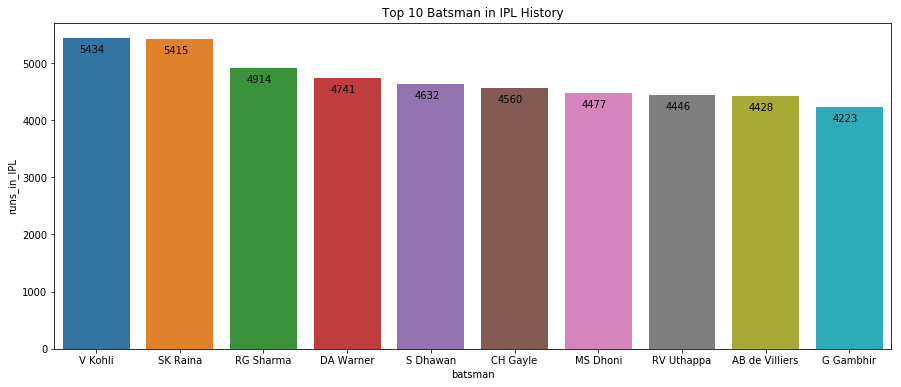

In [33]:
#21 Top 10 batsman with highest score in IPL history
individual_scores = deliveries.groupby(['batsman']).agg({'batsman_runs':['sum']}).reset_index()
individual_scores.columns = ['batsman','runs_in_IPL']
top_10_batsman = individual_scores.nlargest(10,columns=['runs_in_IPL'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_batsman.batsman,top_10_batsman.runs_in_IPL)
fig.set_title('Top 10 Batsman in IPL History')
for i,runs in enumerate(top_10_batsman.runs_in_IPL):
    fig.text(i-0.2,runs-250,runs)

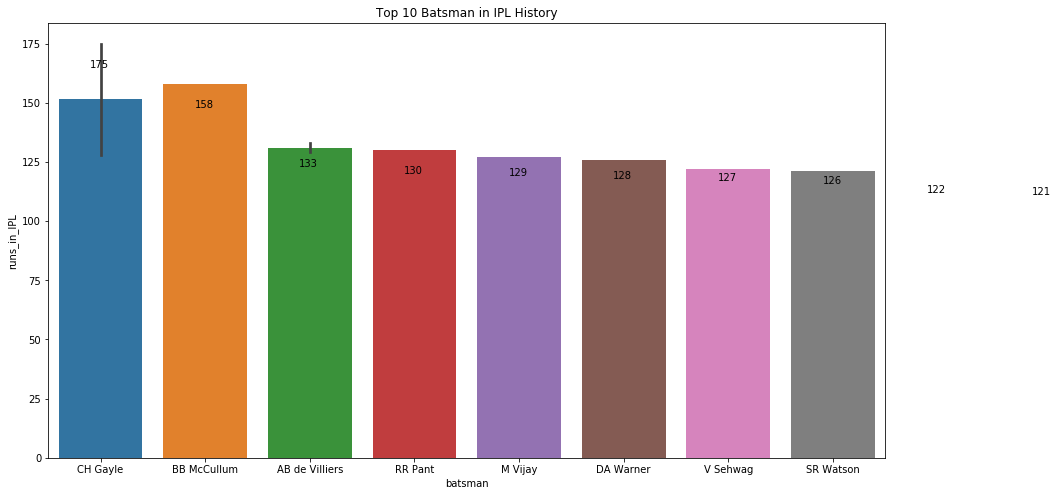

In [34]:
#22 Top 10 batsman with highest individual score in a match in IPL history
individual_scores = deliveries.groupby(['match_id','batsman']).agg({'batsman_runs':['sum']}).reset_index()
individual_scores.columns = ['match_id','batsman','runs_in_IPL']
top_10_batsman = individual_scores.nlargest(10,columns=['runs_in_IPL'])

fig = plt.figure(figsize=(15,8))
fig = sns.barplot(top_10_batsman.batsman,top_10_batsman.runs_in_IPL)
fig.set_title('Top 10 Batsman in IPL History')
for i,runs in enumerate(top_10_batsman.runs_in_IPL):
    fig.text(i-0.1,runs-10,runs)

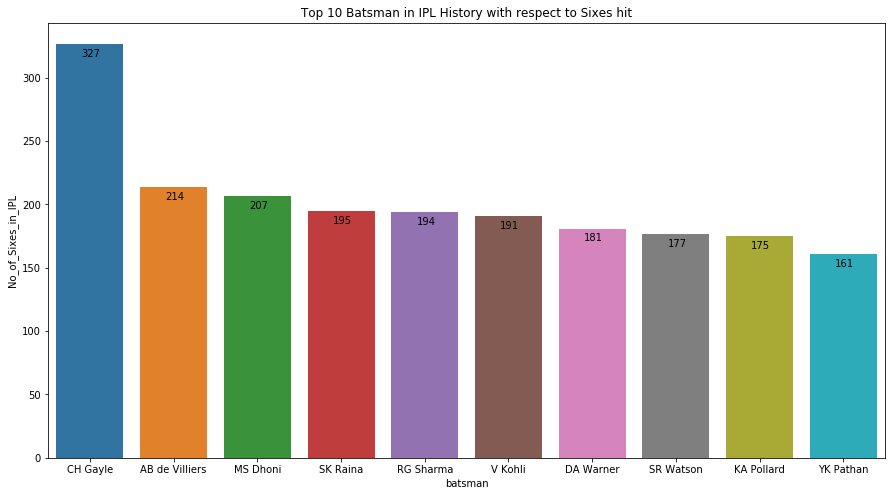

In [35]:
#23 Top 10 batsman with max number of sixes in IPL

sixes_df = deliveries[deliveries.batsman_runs==6]
individual_sixes = sixes_df.groupby('batsman').agg({'batsman_runs':['count']}).reset_index()
individual_sixes.columns = ['batsman','No_of_Sixes_in_IPL']
top_10_batsman = individual_sixes.nlargest(10,columns=['No_of_Sixes_in_IPL'])

fig = plt.figure(figsize=(15,8))
fig = sns.barplot(top_10_batsman.batsman,top_10_batsman.No_of_Sixes_in_IPL)
fig.set_title('Top 10 Batsman in IPL History with respect to Sixes hit')
for i,sixes in enumerate(top_10_batsman.No_of_Sixes_in_IPL):
    fig.text(i-0.1,sixes-10,sixes)

In [36]:
deliveries[~deliveries.dismissal_kind.isnull()].dismissal_kind.unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [37]:
# BOWLER STATS

# not considering Byes & LegByes as they are not considered in bowler stats
bowler_stats = deliveries.groupby('bowler').agg({'match_id':['nunique'],
                                                 'ball':['count'],
                                                 'wide_runs':['sum'],
                                                 'noball_runs':['sum'],
                                                 'penalty_runs':['sum'],
                                                 'batsman_runs':['sum']}).reset_index()
bowler_stats.columns = ['bowler','no_of_innings','balls_bowled','wide_runs','noball_runs','penalty_runs','batsman_runs']

a = bowler_stats.balls_bowled//6
b = bowler_stats.balls_bowled%6
c = []
for i in range(len(a)):
    overs = str(a[i])+'.'+str(b[i])
    c.append(float(overs))
bowler_stats['overs_bowled'] = c
bowler_stats['runs_given'] = bowler_stats.wide_runs+bowler_stats.noball_runs+bowler_stats.penalty_runs+bowler_stats.batsman_runs
bowler_stats.drop(['wide_runs','noball_runs','batsman_runs','penalty_runs'],axis=1,inplace=True)

# adding wickets taken by bowler to the bowler_stats df
wickets_df = deliveries[~deliveries.dismissal_kind.isnull()]
wickets_df = wickets_df[(wickets_df.dismissal_kind!='run out')][(wickets_df.dismissal_kind!='retired hurt')]
individual_wickets = wickets_df.groupby(['bowler']).agg({'player_dismissed':['count']}).reset_index()
individual_wickets.columns = ['bowler','wickets_taken']

bowler_stats = pd.merge(bowler_stats,individual_wickets,on='bowler',how='left')
bowler_stats.fillna(0,inplace=True)
bowler_stats = bowler_stats.astype({'wickets_taken':'int'})

# adding maiden overs bowled by bowlers to bowler_stats df
maiden_over = deliveries.groupby(['bowler','match_id','over',]).agg({'wide_runs':['sum'],
                                                        'noball_runs':['sum'],
                                                        'penalty_runs':['sum'],
                                                        'batsman_runs':['sum']}).reset_index()
maiden_over.columns= ['bowler','match_id','over','wide','noball','penalty','runs']
maiden_over['total_runs'] = maiden_over.wide+maiden_over.noball+maiden_over.penalty+maiden_over.runs
maiden_over = maiden_over[maiden_over.total_runs == 0]
maiden = maiden_over.groupby('bowler').agg({'bowler':['count']}).reset_index()
maiden.columns= ['bowler','maiden_overs_bowled']

bowler_stats = pd.merge(bowler_stats,maiden,on='bowler',how='left')
bowler_stats.fillna(0,inplace=True)
bowler_stats = bowler_stats.astype({'maiden_overs_bowled':'int'})

# adding economy of bowler to bowler_stats df
bowler_stats['economy'] = round((bowler_stats.runs_given/bowler_stats.balls_bowled)*6,2)
bowler_stats.head(10)

C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,bowler,no_of_innings,balls_bowled,overs_bowled,runs_given,wickets_taken,maiden_overs_bowled,economy
0,A Ashish Reddy,20,270,45.0,396,18,0,8.80
1,A Chandila,12,234,39.0,242,11,0,6.21
2,A Choudhary,5,108,18.0,144,5,2,8.00
3,A Dananjaya,1,25,4.1,48,0,0,11.52
4,A Flintoff,3,66,11.0,105,2,0,9.55
5,A Joseph,3,55,9.1,92,6,1,10.04
6,A Kumble,42,983,163.5,1058,45,4,6.46
7,A Mishra,147,3172,528.4,3804,156,5,7.20
8,A Mithun,16,312,52.0,472,7,0,9.08
9,A Nehra,88,1974,329.0,2495,106,2,7.58


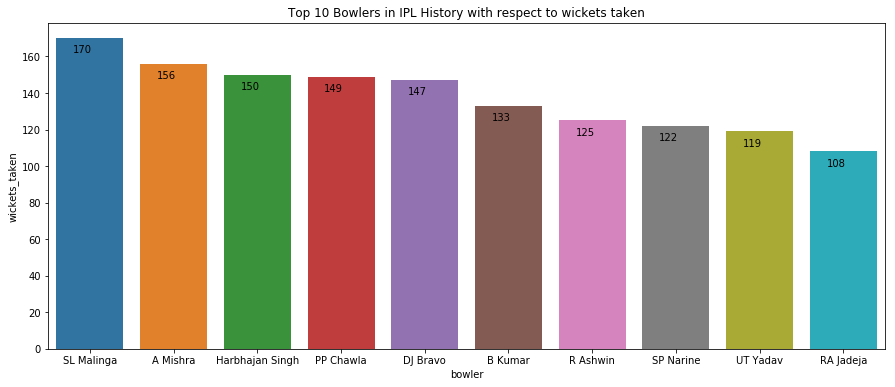

In [38]:
#24 Top 10 bowlers with respect to highest wickets in IPL history

top_10_bowler = bowler_stats.nlargest(10,columns=['wickets_taken'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_bowler.bowler,top_10_bowler.wickets_taken)
fig.set_title('Top 10 Bowlers in IPL History with respect to wickets taken')
for i,wickets in enumerate(top_10_bowler.wickets_taken):
    fig.text(i-0.2,wickets-8,wickets)

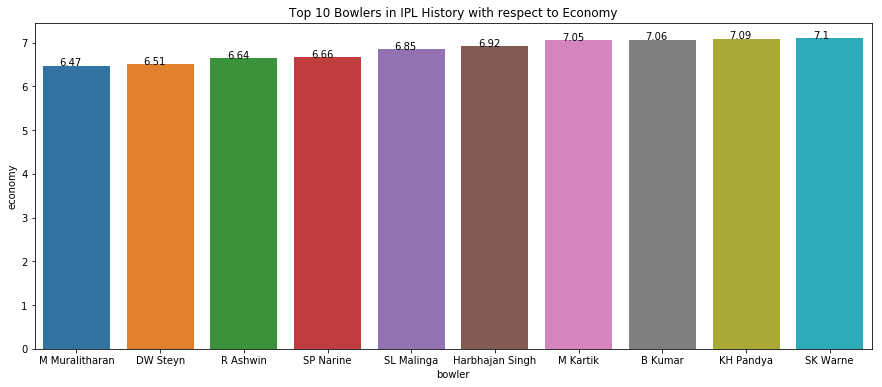

In [39]:
#25 Top 10 bowlers with best Economy in IPL history and have played atleast 50 matches in IPL

top_10_bowler = bowler_stats[bowler_stats.no_of_innings >=50].nsmallest(10,columns=['economy'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_bowler.bowler,top_10_bowler.economy)
fig.set_title('Top 10 Bowlers in IPL History with respect to Economy')
for i,eco in enumerate(top_10_bowler.economy):
    fig.text(i-0.2,eco-0.,eco)

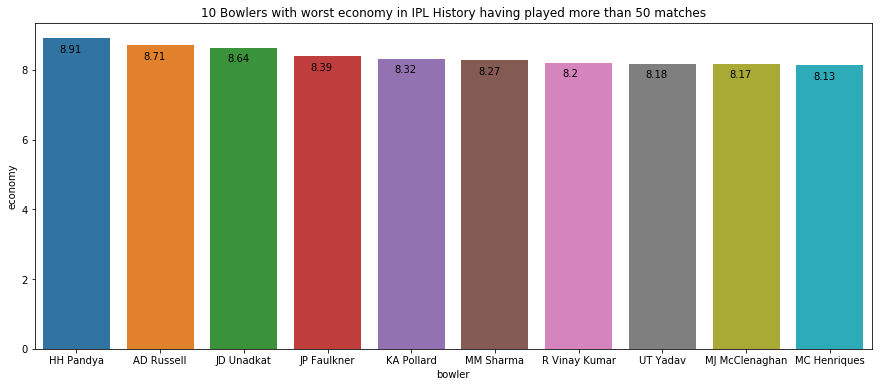

In [40]:
#26 10 bowlers with worst Economy in IPL history and have played atleast 50 matches in IPL

top_10_bowler = bowler_stats[bowler_stats.no_of_innings >=50].nlargest(10,columns=['economy'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_bowler.bowler,top_10_bowler.economy)
fig.set_title('10 Bowlers with worst economy in IPL History having played more than 50 matches')
for i,eco in enumerate(top_10_bowler.economy):
    fig.text(i-0.2,eco-0.4,eco)

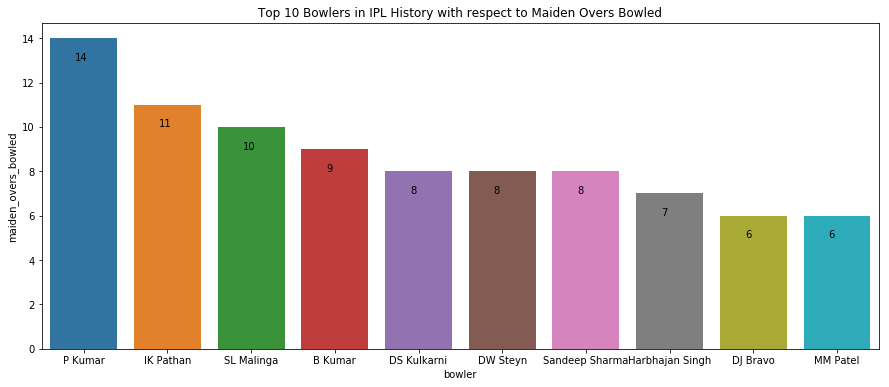

In [41]:
#27 Top 10 bowlers who bowled maiden overs in IPL

top_10_bowler = bowler_stats.nlargest(10,columns=['maiden_overs_bowled'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_bowler.bowler,top_10_bowler.maiden_overs_bowled)
fig.set_title('Top 10 Bowlers in IPL History with respect to Maiden Overs Bowled')
for i,maid in enumerate(top_10_bowler.maiden_overs_bowled):
    fig.text(i-0.1,maid-1,maid)

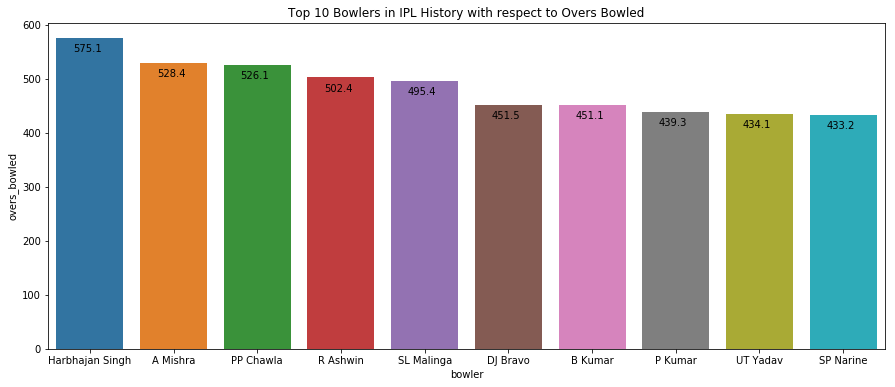

In [42]:
#28 Top 10 bowlers with respect to number of Overs bowled

top_10_bowler = bowler_stats.nlargest(10,columns=['overs_bowled'])

fig = plt.figure(figsize=(15,6))
fig = sns.barplot(top_10_bowler.bowler,top_10_bowler.overs_bowled)
fig.set_title('Top 10 Bowlers in IPL History with respect to Overs Bowled')
for i,overs in enumerate(top_10_bowler.overs_bowled):
    fig.text(i-0.2,overs-25,overs)

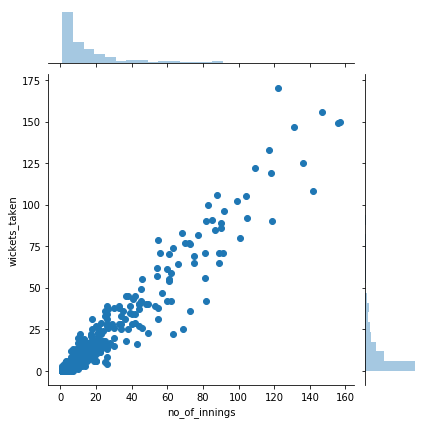

In [44]:
# Plot between No of innings a bowler bowled and wickets taken
sns.jointplot(bowler_stats.no_of_innings,bowler_stats.wickets_taken)

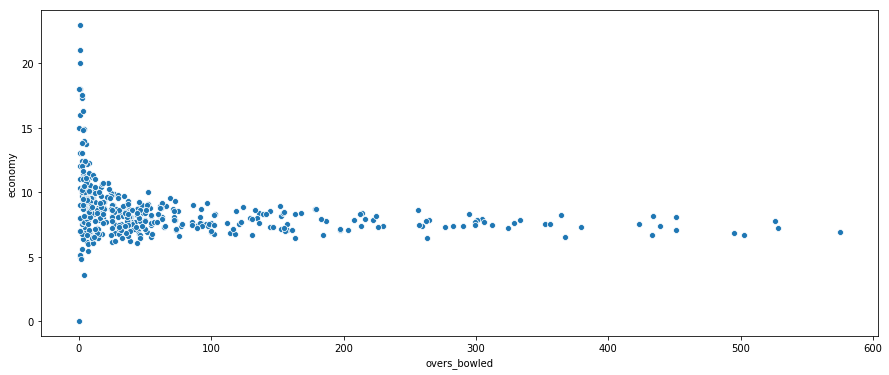

In [45]:
# Plot between number ofo overs bowled & economy of bowler
fig = plt.figure(figsize=(15,6))
fig = sns.scatterplot(bowler_stats.overs_bowled,bowler_stats.economy)

(5, 9)

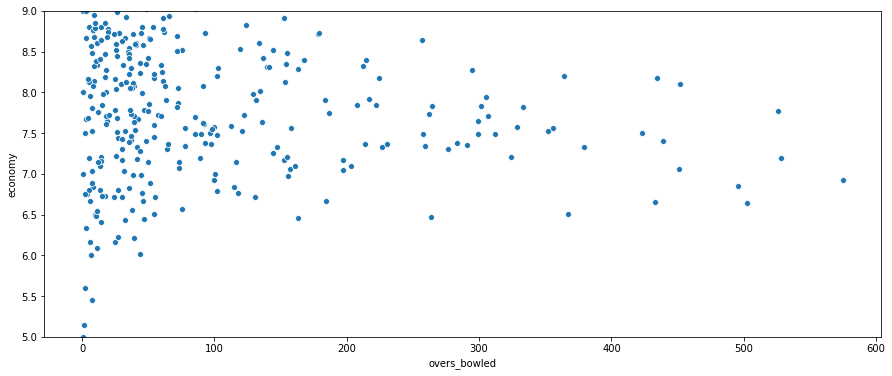

In [46]:
fig = plt.figure(figsize=(15,6))
fig = sns.scatterplot(bowler_stats.overs_bowled,bowler_stats.economy)
fig.set_ylim([5,9])